In [1]:
!pip install sidrapy

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install seaborn

In [5]:
!pip install matplotlib

In [6]:
# Importar bibliotecas

import sidrapy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pls

In [10]:
# Importar dados de inflação

# obs: as infos dos argumentos estão no link da api do sidra: /t/1737/n1/all/v/2265/p/all/d/v2265%202

ipca_raw = sidrapy.get_table(table_code = '1737', 
                            territorial_level = '1',
                            ibge_territorial_code = 'all',
                            variable = '2265',
                            period = 'all',
                            header = 'n')

In [11]:
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
522,1,Brasil,2,%,3.16,1,Brasil,202306,junho 2023,2265,IPCA - Variação acumulada em 12 meses
523,1,Brasil,2,%,3.99,1,Brasil,202307,julho 2023,2265,IPCA - Variação acumulada em 12 meses
524,1,Brasil,2,%,4.61,1,Brasil,202308,agosto 2023,2265,IPCA - Variação acumulada em 12 meses
525,1,Brasil,2,%,5.19,1,Brasil,202309,setembro 2023,2265,IPCA - Variação acumulada em 12 meses


In [21]:
# Selecionando somente as colunas de interesse pelo método loc do pandas e renomeando as colunas pelo método rename

ipca = (
        ipca_raw 
        .loc[0:, ['V', 'D2C']]
        .rename(columns = {'V':'ipca',
                          'D2C':'date'})
)

In [15]:
ipca

,IPCA,date
0,...,197912
1,...,198001
2,...,198002
3,...,198003
4,...,198004
...,...,...
522,3.16,202306
523,3.99,202307
524,4.61,202308
525,5.19,202309


In [22]:
# Alterando o tipo de dados para numérico (float)

ipca['ipca'] = ipca['ipca'].astype(float)

ValueError: could not convert string to float: '...'

In [33]:
# O erro aconteceu porque tem dados na coluna que não se reconhecem como passíveis de serem transformados em estilo float. 
# São os "..." das primeiras linhas. Então, precisamos filtrar antes de aplicar o astype

ipca = ipca.loc[ipca.date >= '2004-01-01']

In [34]:
# Alterando o tipo de dados para data

ipca['date'] = pd.to_datetime(ipca['date'],
                             format = '%Y%m')

In [38]:
# Agora sim, alterando o tipo de dados para numérico (float)

ipca['ipca'] = ipca['ipca'].astype(float)

In [41]:
ipca.describe()

,ipca,date
count,238.000000,238
mean,5.788487,2013-11-15 12:30:15.126050304
min,1.880000,2004-01-01 00:00:00
25%,4.250000,2008-12-08 18:00:00
50%,5.620000,2013-11-16 00:00:00
75%,6.700000,2018-10-24 06:00:00
max,12.130000,2023-10-01 00:00:00
std,2.151078,NaN


<Axes: xlabel='date', ylabel='ipca'>

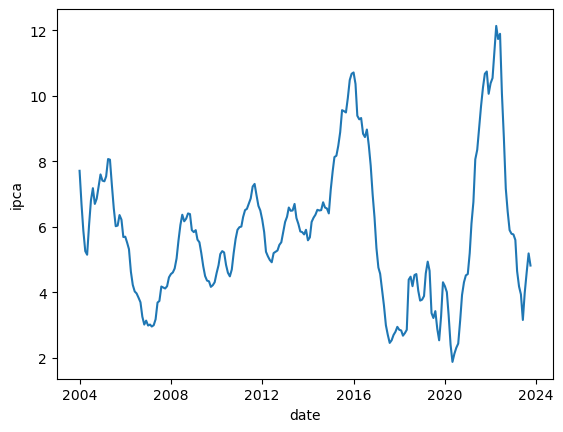

In [42]:
# Construindo o gráfico com a biblioteca Seaborn

sns.lineplot(x = 'date',
             y = 'ipca',
             data = ipca)

<Axes: xlabel='ipca', ylabel='Count'>

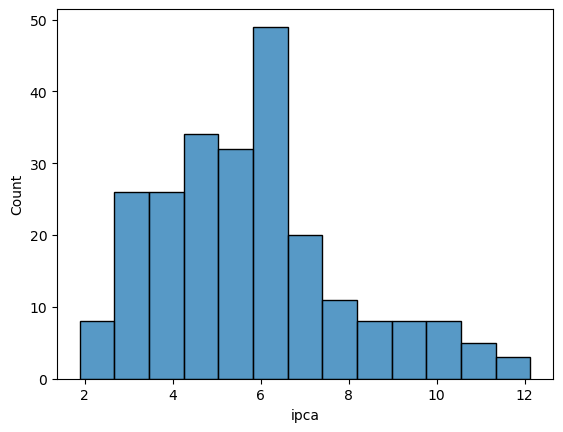

In [43]:
sns.histplot(x = 'ipca',
            data = ipca)

<Axes: ylabel='ipca'>

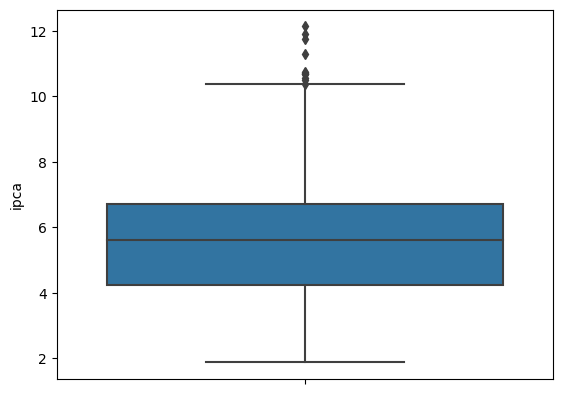

In [44]:
sns.boxplot(y = 'ipca',
           data = ipca)

In [67]:
# Importando dados da taxa de desocupação

# link api: /t/6381/n1/all/v/4099/p/all/d/v4099%201

desocupacao_raw = sidrapy.get_table(table_code = '6381',
                                   territorial_level = '1',
                                   ibge_territorial_code = 'all',
                                   variable = '4099',
                                   period = 'all',
                                   header = 'n')

desocupacao_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,2,%,8.0,1,Brasil,201203,jan-fev-mar 2012,4099,"Taxa de desocupação, na semana de referência, ..."
1,1,Brasil,2,%,7.8,1,Brasil,201204,fev-mar-abr 2012,4099,"Taxa de desocupação, na semana de referência, ..."
2,1,Brasil,2,%,7.7,1,Brasil,201205,mar-abr-mai 2012,4099,"Taxa de desocupação, na semana de referência, ..."
3,1,Brasil,2,%,7.6,1,Brasil,201206,abr-mai-jun 2012,4099,"Taxa de desocupação, na semana de referência, ..."
4,1,Brasil,2,%,7.5,1,Brasil,201207,mai-jun-jul 2012,4099,"Taxa de desocupação, na semana de referência, ..."
...,...,...,...,...,...,...,...,...,...,...,...
134,1,Brasil,2,%,8.3,1,Brasil,202305,mar-abr-mai 2023,4099,"Taxa de desocupação, na semana de referência, ..."
135,1,Brasil,2,%,8.0,1,Brasil,202306,abr-mai-jun 2023,4099,"Taxa de desocupação, na semana de referência, ..."
136,1,Brasil,2,%,7.9,1,Brasil,202307,mai-jun-jul 2023,4099,"Taxa de desocupação, na semana de referência, ..."
137,1,Brasil,2,%,7.8,1,Brasil,202308,jun-jul-ago 2023,4099,"Taxa de desocupação, na semana de referência, ..."


In [66]:
desocupacao = (
    desocupacao_raw
    .loc[0:,['V','D2C']]
    .rename(columns = {'V': 'desocupacao', 
                       'D2C': 'date'})
    )

desocupacao

,desocupacao,date
0,8.0,201203
1,7.8,201204
2,7.7,201205
3,7.6,201206
4,7.5,201207
...,...,...
134,8.3,202305
135,8.0,202306
136,7.9,202307
137,7.8,202308


In [78]:
desocupacao['date'] = pd.to_datetime(desocupacao['date'],
                                    format = '%Y%m')

desocupacao = desocupacao.loc[desocupacao.date >= '2004-01-01']

desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
134,8.3,2023-05-01
135,8.0,2023-06-01
136,7.9,2023-07-01
137,7.8,2023-08-01


In [80]:
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)

desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
134,8.3,2023-05-01
135,8.0,2023-06-01
136,7.9,2023-07-01
137,7.8,2023-08-01


In [81]:
df_dados = pd.merge(ipca, desocupacao, on = 'date')

df_dados

,ipca,date,desocupacao
0,5.24,2012-03-01,8.0
1,5.10,2012-04-01,7.8
2,4.99,2012-05-01,7.7
3,4.92,2012-06-01,7.6
4,5.20,2012-07-01,7.5
...,...,...,...
134,3.94,2023-05-01,8.3
135,3.16,2023-06-01,8.0
136,3.99,2023-07-01,7.9
137,4.61,2023-08-01,7.8


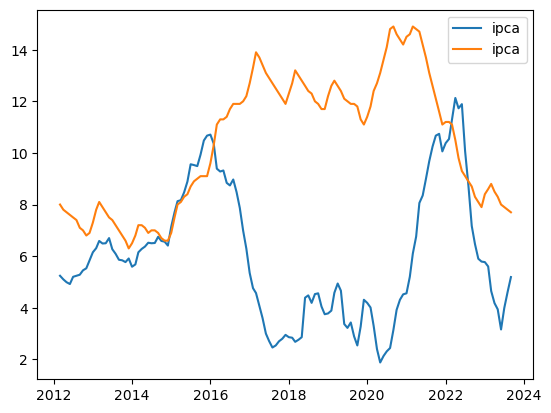

In [85]:
# Gráficos pelo Matplotlib

pls.plot('date',
        'ipca',
        data = df_dados,
         label = 'ipca')

pls.plot('date',
        'desocupacao',
        data = df_dados,
        label = 'ipca')

pls.legend()

In [86]:
import statsmodels.formula.api as smf

In [94]:
# Usando a biblioteca StatsModels para criar o modelo. Método de estimação OLS e o .fit permite rodar o modelo

modelo = smf.ols('ipca ~ desocupacao', data = df_dados).fit()

In [95]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.956
Date:                Tue, 14 Nov 2023   Prob (F-statistic):            0.00197
Time:                        15:20:12   Log-Likelihood:                -323.02
No. Observations:                 139   AIC:                             650.0
Df Residuals:                     137   BIC:                             655.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.6996      0.872      9.974      0.000       6.975      10.424
desocupacao    -0.2575      0.082     -3.155      0.002      -0.419      -0.096
==============================================================================
Omnibus:                       15.590   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.927
Skew:                           0.815   Prob(JB):                     0.000211
Kurtosis:                       2.484   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='desocupacao', ylabel='ipca'>

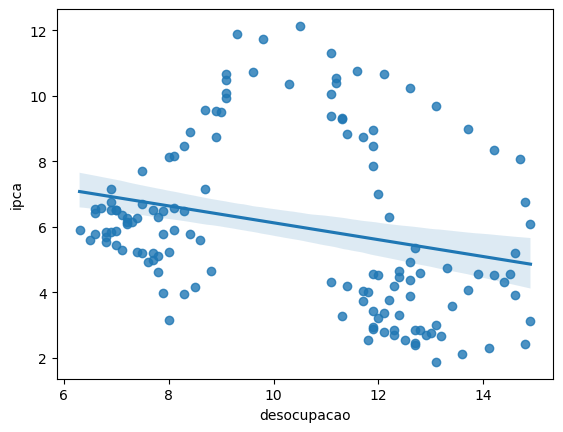

In [97]:
sns.regplot(x = 'desocupacao',
           y = 'ipca',
           data = df_dados)